In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import re

# Data Cleaning

Cleaning selected data (TV shows with more than 70% episodes collected) and looking for corrupted transcripts to remove (outliers in boxplots)

In [3]:
%store -r df_nation
%store -r df_series_groups

In [4]:
df_nation

,base_forms,all_forms,levels,levels_frequency,levels_coverage
0,aal,aal,29,0,29
1,aas,aas,29,0,29
2,ab,ab,29,0,29
3,aba,aba,29,0,29
4,abb,abb,29,0,29
...,...,...,...,...,...
105472,hardheaded,hardheadedness,28,0,28
105473,hardhearted,hardhearted,28,0,28
105474,hardhearted,hardheartedly,28,0,28
105475,hardhearted,hardheartedness,28,0,28


In [3]:
# df_nation.rename(columns={'levels':'1000-level'}, inplace=True)
# conditions_frequency = [(df_nation['levels'] <= 3),
#              (df_nation['levels'] == 4),
#              (df_nation['levels'] >= 5) & (df_nation['levels']<= 14)]
# values_frequency = ['1-3', '4', '5-14']
# df_nation['levels_frequency'] = np.select(conditions_frequency, values_frequency)

# conditions_coverage = [(df_nation['levels']<=14),
#                         (df_nation['levels']>=15) & (df_nation['levels']<=25),
#                       (df_nation['levels']>=26)]
# values_coverage = [df_nation['levels'], 15, df_nation['levels']]

# df_nation['levels_coverage'] = np.select(conditions_coverage, values_coverage)

In [17]:
# downloading series script
input_file = open('df_friends','rb')
df_friends = pickle.load(input_file)
df_friends = df_friends.reset_index(drop=True)

In [37]:
df_friends['transcripts'] = df_friends['transcripts'].apply(lambda x: x.lower())
# df_friends['transcripts'] = df_friends['transcripts'].apply(lambda x: x.title())


df_friends[(df_friends['transcripts'].str.contains('feel kind of'))]

,transcripts,series_titles,years,seasons,season_episodes,season_episode_names
10,do you think they have yesterday's daily news?...,friends,1994,1,11,S1E11: The One with Mrs. Bing
92,are you kidding me? joey? did i wake you? the ...,friends,1994,4,20,S4E20: The One with All the Wedding Dresses
123,"check it out, this is unbelievable! joey's bee...",friends,1994,6,3,S6E3: The One with Ross's Denial
132,hey. you're not gonna believe this. i made up ...,friends,1994,6,12,S6E12: The One with the Joke


In [40]:
df_friends.at[132, 'transcripts'] #you know? or rachel and i should be together... ...and we should get some kind of message service. hang in there.
# df_friends.at[39, 'transcripts'] #i mean well, you know what i mean. just hang in there, okay? okay, i\'ll go out first, all right?
# df_friends.at[83, 'transcripts'] #i don\'t know squat about dinosaurs! i\'m ted, and i just moved here, and new york really scares me. -there you go! -hang in there, teddy!
# df_friends.at[92, 'transcripts']

'hey. you\'re not gonna believe this. i made up a joke\nand sent it in to playboy. they printed it. yeah. i didn\'t know they prints jokes. they print jokes, interviews,\nhard-hitting journalism. it\'s not just about the pictures. it didn\'t work on mom,\nit\'s not gonna work on us. here, check it out. it\'s the first one too. right there. group:\nha, ha. chandler:\nthat is funny. it was also funny when i made it up. - what?\n- i made that joke up. uh, oh, oh. no, you didn\'t. i did. uh, uh, oh. yes, i did. i told dan and he said it\nwas the funniest joke he\'d ever heard. hey, tell dan thanks. [laughing] what? i\'m sorry. i was just reading the joke below it.\nman, that one is funny. monica, you remember me\ntelling you that joke, right? - no.\n- seriously? you tell a lot of jokes. look, it\'s my joke. but if it makes you feel any better,\nthey don\'t print the name. so it doesn\'t really matter\nwho gets credit. yeah, i guess. - hey, guys.\n- joey, playboy printed my joke! no, it\'s 

In [6]:
# df_series_clean_except_transcripts.groupby('series_titles').count()
df_friends = df_friends.assign(raw_tokens=df_friends['transcripts'].apply(lambda x:len(x.split())))

In [7]:
#the difference between tokens_raw and tokens shouldn't be so much since only speaker's name,
#words within parentheses and squarebrackets were removed
print('Min Raw: ' + str(df_friends['raw_tokens'].min()))
# #and only contractions were added "'n" --> 'not'
print('Max Raw: ' + str(df_friends['raw_tokens'].max()))

Min Raw: 1855
Max Raw: 6419


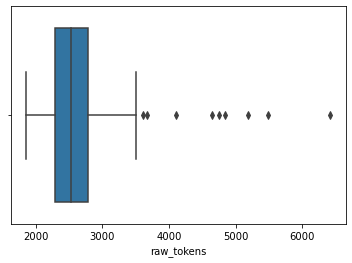

In [8]:
sns.boxplot(x=df_friends['raw_tokens'])

In [9]:
# cleaning transcripts
from cleaning import clean_transcripts

round1 = lambda x: clean_transcripts(x)
df_friends['transcripts'] = df_friends['transcripts'].apply(round1)

In [10]:
# df_series_clean_except_transcripts.groupby('series_titles').count()
df_friends = df_friends.assign(tokens=df_friends['transcripts'].apply(lambda x:len(x.split())))

In [11]:
#the difference between tokens_raw and tokens shouldn't be so much since only speaker's name,
#words within parentheses and squarebrackets were removed
print('Min Raw: ' + str(df_friends['raw_tokens'].min()) + ', Min Clean: '+ str(df_friends['tokens'].min()))
# #and only contractions were added "'n" --> 'not'
print('Max Raw: ' + str(df_friends['raw_tokens'].max()) + ', Max Clean: '+ str(df_friends['tokens'].max()))

Min Raw: 1855, Min Clean: 1980
Max Raw: 6419, Max Clean: 6428


# Remove corrupted data

In [12]:
#transcript in other language S1E2  S2E1 ... checked easiest and hardes episode
df_friends = df_friends.drop([1,24], axis=0)
# df_friends[df_friends['season_episode_names'].str.contains('^S2E1')]

#outliers on the right: 228, 199, 206, 119, 95, 168, 233, 192, 216 (checked 119 manually and it's wrong data, 228 it's fine though)
#verify tokens in outliers
# df_friends[df_friends.index.isin([228, 199, 206, 119, 95, 168, 233, 192, 216])]
df_friends = df_friends.drop([119, 94, 95, 168, 233, 192, 216], axis=0)
df_friends.reset_index(drop=True, inplace=True)
# no outliers on the left + checked manually the episode with lowest tokens

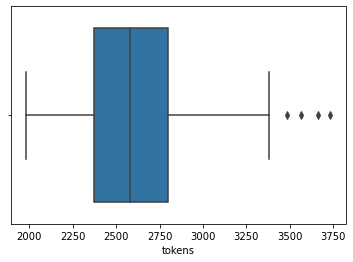

In [13]:
# 120 - 150 words per min mean of data = 4149 tokens) **using runtimeMinutes IMDb**
# - MIN: sitcom 22 min = 120wpm -> 2640 - 3300 tokens episode sitcom (though in some scens they don't speak at all ... too many visuals ... assume 50% of speech in scenes -> 1320)
#static plot
sns.boxplot(x=df_friends['tokens'])

#dynamic plot
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode()

# fig = go.Figure()
# # fig.add_box(x=df_friends["tokens"], text=df_friends.index)
# fig.add_box(x=df_friends["tokens"], text=df_friends['season_episode_names'])
# iplot(fig)

# Exploratory Data Analysis¶

### Document-Term Matrix

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse
cv = CountVectorizer()#only misleading words excluded for the analysis
cv_matrix = cv.fit_transform(df_friends['transcripts'])
df_dtm = pd.DataFrame.sparse.from_spmatrix(cv_matrix, index=df_friends.index,
                                           columns=cv.get_feature_names())

In [15]:
df_dtm = df_dtm.T

### Formula

In [23]:
#behaviour
def get_frames(indices, dtm, thousand_level=None): #, thousand_level ['4'], ['5-14']
    """1. The df_dtm gives the number of times a word (all_forms) shows up in an episode/movie
       2. Then its joined to get the level and base_forms of each word
       3. The final df has the words counted for each episode so it can be seen base_forms repetition in the final df"""
    frames = []
    for index in indices:
        df_count_words = dtm[[index]].loc[dtm[index]!=0]
        df_count_words = df_count_words.reset_index()
        df_count_words.rename(columns={"index": "all_forms", index: "count"}, inplace=True)

        df_count_words_level = pd.merge(df_count_words, df_nation[['base_forms', 'all_forms',
                                'levels_frequency', 'levels', 'levels_coverage']], how='left', on='all_forms', indicator=True)
        df_count_words_level.loc[df_count_words_level['_merge']=='left_only', 'levels_coverage'] = 100
        if thousand_level is not None: #only consider words in specific levels
            df_count_words_level = df_count_words_level[df_count_words_level['levels_frequency'].isin(thousand_level)]
        frames.append(df_count_words_level)
    df_count_words_level = pd.concat(frames)
    return df_count_words_level

def get_count(df_movie_nation):
    """Grouping by base_forms of word and summing their number of encounters
    Note: the 'count' column type in most cases is 'SPARSE NUMPY INT'. Then I have to use the 
    first 2 lines in the 'try' block to get 'int'. However, for some reason some columns after
    concatenating (in def get_frames)  are 'int'values. They go straigt to the 'except' block """
    try:
        int_value = [i.item() for i in df_movie_nation['count']]
        df_movie_nation['count'] = int_value
        df_count = df_movie_nation.groupby(by=['base_forms']).sum().reset_index()
        df_count = df_count.rename(columns={'count':'base_forms_encounters'})
        df_count = df_count.sort_values(by=['base_forms_encounters'], ascending=False)
    except:
        df_count = df_movie_nation.groupby(by=['base_forms']).sum().reset_index()
        df_count = df_count.rename(columns={'count':'base_forms_encounters'})
        df_count = df_count.sort_values(by=['base_forms_encounters'], ascending=False)
    return df_count

In [24]:
def get_coverage(indices, df_dtm):
    frames = []
    for episode_index in indices:
        df_coverage_episode = get_frames([episode_index], df_dtm) ##
        df_coverage_episode = df_coverage_episode[['count' ,'levels_coverage']].groupby('levels_coverage').sum()
        df_coverage_episode.drop([28, 29], axis=0, inplace=True, errors='ignore')
        df_coverage_episode['%'] = 100 * (round(df_coverage_episode['count']/
                                            df_coverage_episode['count'].sum(), 4))
        df_coverage_episode = df_coverage_episode.reset_index()
        condition = [(df_coverage_episode['levels_coverage']<=4),
            (df_coverage_episode['levels_coverage']>=5) & (df_coverage_episode['levels_coverage']<=15),
                    (df_coverage_episode['levels_coverage']>=26)] #15 includes list from 15 to 25
        values = [df_coverage_episode['levels_coverage'], 5, df_coverage_episode['levels_coverage']]
        df_coverage_episode['lvl'] = np.select(condition, values)
        df_coverage_episode = df_coverage_episode.groupby('lvl').sum()
        df_coverage_episode['cumulative'] = df_coverage_episode['%'].cumsum()
        if len(indices)==1:   
            df_coverage_episode = df_coverage_episode[['count', '%']].T.reset_index(drop=True)
        elif len(indices)>1:
            df_coverage_episode = df_coverage_episode[['%']].T.reset_index(drop=True)
            df_coverage_episode['index'] = episode_index
        frames.append(df_coverage_episode)
    return frames

### Episodes with less dialogues (less words to worry about!)

In [17]:
df_friends.sort_values('tokens')[:10]

,transcripts,series_titles,years,seasons,season_episodes,season_episode_names,raw_tokens,tokens
36,all right no peeking no peeking no peeking no ...,friends,1994,2,15,S2E15: The One Where Ross and Rachel... You Know,1855,1980
115,previously on friends do not come out here i...,friends,1994,5,24,S5E24: The One in Vegas: Part 2,1957,1987
90,are you kidding me joey did i wake you the one...,friends,1994,4,20,S4E20: The One with All the Wedding Dresses,1884,1991
77,i just saw kathy naked it was like torture if ...,friends,1994,4,7,S4E7: The One Where Chandler Crosses the Line,2021,2021
71,phoebe found out about this lady who knew her ...,friends,1994,4,1,S4E1: The One with the Jellyfish,1905,2029
91,all of a sudden so much is happening i know ro...,friends,1994,4,21,S4E21: The One with the Invitation,1951,2050
5,everybody shh uh central perk\nis proud to pre...,friends,1994,1,7,S1E7: The One with the Blackout,2039,2071
95,i am phoebe buffay and i have babies coming ou...,friends,1994,5,3,S5E3: The One Hundredth,1952,2071
6,hey gorgeous how s it going dehydrated japanes...,friends,1994,1,8,S1E8: The One Where Nana Dies Twice,2032,2085
10,no no we re done the one with the dozen lasagn...,friends,1994,1,12,S1E12: The One with the Dozen Lasagnas,2032,2099


### Vocabulary coverage of a random episode

In [31]:
index = 54 #episode number is different from index!!!
series_name = 'Friends'
df_random_episode = get_coverage([index], df_dtm)[0]
df_random_episode.rename(columns={26:'Character names', 27:'Interjections', 
                                  100:series_name+" words"}, inplace=True)
df_random_episode.T.rename(columns={0:'count', 1:'%'})

,count,%
lvl,,
1.0,2059.0,86.66
2.0,66.0,2.78
3.0,10.0,0.42
4.0,16.0,0.67
5.0,67.0,2.82
Character names,63.0,2.65
Interjections,80.0,3.37
Friends words,15.0,0.63


In [34]:
for i in df_random_episode.values:
    print(str(i[0])+', '+f'{i[1]:.0f}'+', '+f'{i[2]:.2f}')

2059.0, 66, 10.00
86.66, 3, 0.42


### Vocabulary coverage of the average Friends episode

In [25]:
frames = get_coverage(df_friends.index.values, df_dtm)

In [26]:
#comparison list without 100 vs list 100 
# 1: 88.97 -> 88.54, 2: 3.04 ->3.02
pd.concat(frames, axis=0, ignore_index=True)[[1, 2, 3, 4, 5, 26, 27, 100]].mean()

1.0      88.540533
2.0       3.029778
3.0       0.772667
4.0       0.697556
5.0       2.128400
26.0      2.425689
27.0      1.920267
100.0     0.486964
dtype: float64

### Words created in the tv shows (cromulent, spam)

In [28]:
df_words_series = get_frames(df_friends.index.values, df_dtm)
df_words_series = df_words_series[['all_forms', 'count', 'levels_coverage']]
df_words_series = df_words_series[df_words_series['levels_coverage']==100]
df_words_series

,all_forms,count,levels_coverage
141,demarco,1,100.0
192,finkel,1,100.0
310,jimmies,1,100.0
386,mento,1,100.0
560,squiggy,1,100.0
...,...,...,...
605,zelner,2,100.0
399,pheebs,3,100.0
417,plicit,1,100.0
444,repack,1,100.0


In [29]:
df_statistics = pd.concat(frames, axis=0, ignore_index=True)[['index', 1, 2, 3, 4, 5, 26, 27]]
df_statistics['Lvl 1'] = df_statistics[1] + df_statistics[26] + df_statistics[27]
df_statistics['Lvl 1+2'] = df_statistics['Lvl 1'] + df_statistics[2]
df_statistics['Lvl 1+2+3'] = df_statistics['Lvl 1+2'] + df_statistics[3]
df_statistics = pd.concat((df_statistics.set_index('index'), df_friends[['season_episode_names', 'seasons']]), axis=1)
df_statistics

,1.0,2.0,3.0,4.0,5.0,26.0,27.0,Lvl 1,Lvl 1+2,Lvl 1+2+3,season_episode_names,seasons
0,88.74,3.28,0.85,0.73,2.43,3.20,0.54,92.48,95.76,96.61,S1E1: The One Where Monica Gets a Roommate,1
1,88.77,2.97,0.74,0.74,2.06,2.01,2.23,93.01,95.98,96.72,S1E3: The One with the Thumb,1
2,87.79,2.98,0.72,0.68,3.94,1.96,0.94,90.69,93.67,94.39,S1E4: The One with George Stephanopoulos,1
3,87.10,2.78,0.76,1.12,2.18,2.82,2.46,92.38,95.16,95.92,S1E5: The One with the East German Laundry Det...,1
4,89.76,2.26,0.80,0.66,2.39,2.21,1.64,93.61,95.87,96.67,S1E6: The One with the Butt,1
...,...,...,...,...,...,...,...,...,...,...,...,...
220,89.26,2.56,0.84,0.62,2.14,2.03,1.87,93.16,95.72,96.56,S10E12: The One with Phoebe's Wedding,10
221,87.60,2.67,0.51,0.55,1.38,2.71,4.19,94.50,97.17,97.68,S10E13: The One Where Joey Speaks French,10
222,88.32,2.12,0.60,0.33,1.37,3.50,3.01,94.83,96.95,97.55,S10E14: The One with Princess Consuela,10
223,90.32,1.87,0.39,0.51,0.99,3.28,1.76,95.36,97.23,97.62,S10E15: The One Where Estelle Dies,10


### Top 10 Friends episodes

In [30]:
for i in df_statistics.sort_values(['Lvl 1'], ascending=False)[:10].values:
    print(i[10])

S4E20: The One with All the Wedding Dresses
S10E15: The One Where Estelle Dies
S5E15: The One with the Girl Who Hits Joey
S7E21: The One with the Vows
S3E16: The One the Morning After
S8E24: The One Where Rachel Has a Baby: Part 2
S6E6: The One on the Last Night
S6E21: The One Where Ross Meets Elizabeth's Dad
S9E14: The One with the Blind Dates
S7E14: The One Where They All Turn Thirty


In [24]:
frames_2 = []
for episode in df_friends_index:
    df_4 = get_frames([episode], df_dtm, ['4']) ##
    df_5 = get_frames([episode], df_dtm, ['5-14']) ##
    df_vocabulary_episode = pd.concat([df_4, df_5])
    df_vocabulary_episode['index'] = episode
    frames_2.append(df_vocabulary_episode)

### What hard words are they saying across all Friends episodes?

In [84]:
df_friends_lvl4_5 = pd.concat(frames_2)
df_friends_lvl4_5 = pd.merge(df_friends_lvl4_5, df_friends[['season_episode_names']].reset_index(), on='index')
df_friends_lvl4_5
# for i in df_friends_lvl4_5.values:
#     print(i[0]+', '+str(i[1])+', '+i[2]+', '+i[3]+', '+i[7])

,all_forms,count,base_forms,levels_frequency,levels,levels_coverage,index,season_episode_names
0,barn,1,barn,4,4.0,4.0,0,S1E1: The One Where Monica Gets a Roommate
1,buzz,1,buzz,4,4.0,4.0,0,S1E1: The One Where Monica Gets a Roommate
2,congratulations,1,congratulate,4,4.0,4.0,0,S1E1: The One Where Monica Gets a Roommate
3,couch,1,couch,4,4.0,4.0,0,S1E1: The One Where Monica Gets a Roommate
4,diary,1,diary,4,4.0,4.0,0,S1E1: The One Where Monica Gets a Roommate
...,...,...,...,...,...,...,...,...
9281,snacks,1,snack,5-14,5.0,5.0,224,S10E16: The One with Rachel's Going Away Party
9282,styrofoam,1,styrofoam,5-14,13.0,13.0,224,S10E16: The One with Rachel's Going Away Party
9283,swab,1,swab,5-14,10.0,10.0,224,S10E16: The One with Rachel's Going Away Party
9284,teen,1,teen,5-14,5.0,5.0,224,S10E16: The One with Rachel's Going Away Party


### Preparing Data for ScatterPlot of all episodes¶

In [26]:
df_1 = df_statistics[['Lvl 1', 'season_episode_names']]
df_1 = df_1.assign(label = 'Lvl 1')
df_1.rename(columns={'Lvl 1':'lvl'}, inplace=True)
df_2 = df_statistics[['Lvl 1+2', 'season_episode_names']]
df_2 = df_2.assign(label = 'Lvl 1+2')
df_2.rename(columns={'Lvl 1+2':'lvl'}, inplace=True)
df_3 = df_statistics[['Lvl 1+2+3', 'season_episode_names']]
df_3 = df_3.assign(label = 'Lvl 1+2+3')
df_3.rename(columns={'Lvl 1+2+3':'lvl'}, inplace=True)
df_dot = pd.concat([df_1, df_2, df_3])
df_dot['lvl'] = df_dot['lvl'].apply(lambda x:round(x,1))

In [27]:
movie_count = []

for index, percentage in enumerate(df_dot['lvl']):
    subset = df_dot.iloc[:index+1]    # Create subset starting at the beginning of dataset until the episode
    count = len(subset[subset['lvl'] == percentage])   # Count all episode with same % in this subset
    movie_count.append(count)
    
df_dot['count'] = movie_count

In [85]:
# Plot coverage on Episodes
# for i in df_dot.values:
#     print(i[1] + ' , ' + i[2] + ' , ' + str(i[3]) + ' , ' + str(i[0]))

# ScatterPlot of all episodes

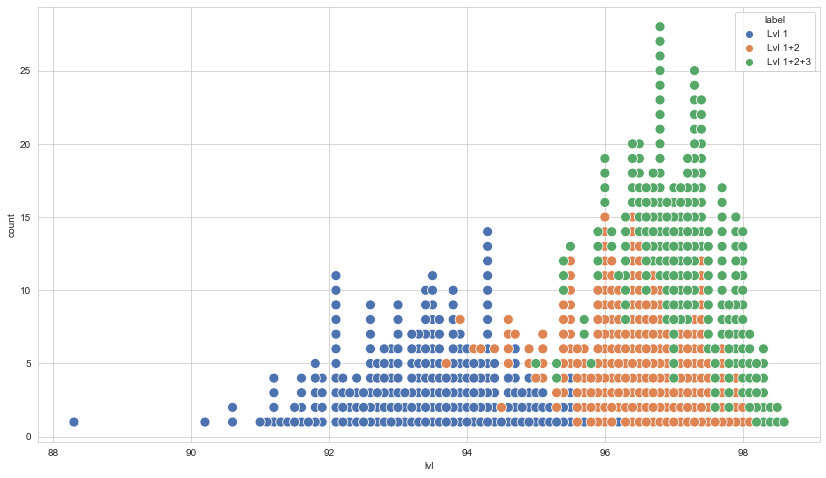

In [82]:
#Static plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.scatterplot(x='lvl', y='count', data=df_dot,
             hue='label', s=100, ax=ax, palette="deep")

# Dynamic plot
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode()

# fig = go.Figure()
# for genre, df_genre in df_dot.groupby('label'):
#     fig.add_scatter(x=df_genre["lvl"], y=df_genre['count'], text=df_genre['season_episode_names'],
#     name=genre, mode='markers')
# iplot(fig)

# Friends Kaggle

In [30]:
import os 

cwd = os.getcwd()
path = os.path.join(cwd+'/'+'Episodes')
file_path = [path+'/'+element for element in os.listdir(path) if element != '.DS_Store']
transcript_friends = []
character_name = []
spoken_words = []
raw_text = []

for file in file_path:
    friends_kaggle_transcript = open(file,'r')
    text = friends_kaggle_transcript.read() #transcript
    text = re.sub('\d+:\d+', '', text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\(.*?\)','',text)
    raw_text = re.findall('\n(.+):(.+)\n', text)
    df = pd.DataFrame({'raw_text':raw_text})
    df['episode'] = file.split('/')[8] #find better way
    transcript_friends.append(df)

In [31]:
df_friends_kaggle = pd.concat(transcript_friends, ignore_index=True)
df_friends_kaggle['character_name'] = df_friends_kaggle['raw_text'].apply(lambda x: x[0])
df_friends_kaggle['spoken_words'] = df_friends_kaggle['raw_text'].apply(lambda x: x[1])
df_friends_kaggle['character_name'] = df_friends_kaggle['character_name'].apply(lambda x: x.title())
df_friends_kaggle

,raw_text,episode,character_name,spoken_words
0,"(Story by, Robert Carlock)",S09E17 The Memorial Service.txt,Story By,Robert Carlock
1,"(Chandler, Hey! Ready to go?)",S09E17 The Memorial Service.txt,Chandler,Hey! Ready to go?
2,"(Ross, Oh yeah, let me just finish this.)",S09E17 The Memorial Service.txt,Ross,"Oh yeah, let me just finish this."
3,"(Joey, Hey Ross, check this out! yeah, I can...",S09E17 The Memorial Service.txt,Joey,"Hey Ross, check this out! yeah, I can't do t..."
4,"(Chandler, What are you doin'?)",S09E17 The Memorial Service.txt,Chandler,What are you doin'?
...,...,...,...,...
61620,"(Ross, No, this is pretty much it.)",S01E23 The Birth.txt,Ross,"No, this is pretty much it."
61621,"(Rachel, You guys wanna get some coffee?)",S01E23 The Birth.txt,Rachel,You guys wanna get some coffee?
61622,"(All, Yeah.)",S01E23 The Birth.txt,All,Yeah.
61623,"(Ross, All right, I'll see you guys later.)",S01E23 The Birth.txt,Ross,"All right, I'll see you guys later."


### Friends characteres by total number of lines

In [32]:
df_friends_lines = df_friends_kaggle.groupby('character_name').count().sort_values('raw_text', ascending=False)[:20]

### Total number of words

In [33]:
#adding blank space to group then
df_friends_kaggle['spoken_words'] = df_friends_kaggle['spoken_words'].apply(lambda x:x+' ')

df_friends_analysis = df_friends_kaggle[['character_name', 'spoken_words']].groupby('character_name').sum()
df_friends_analysis = df_friends_analysis.reset_index()
df_friends_analysis.sort_values(by='character_name')
df_friends_analysis['tokens'] = df_friends_analysis['spoken_words'].apply(lambda x:len(x.split()))
#Top 100 characters
df_friends_analysis = df_friends_analysis.sort_values('tokens', ascending=False)[:100]
df_friends_analysis = df_friends_analysis.reset_index(drop=True)
df_friends_analysis

,character_name,spoken_words,tokens
0,Rachel,"Hey! How was basketball? Oh, no! Who did tha...",94437
1,Ross,"Oh yeah, let me just finish this. Have you s...",93513
2,Joey,"Hey Ross, check this out! yeah, I can't do t...",85609
3,Chandler,Hey! Ready to go? What are you doin'? Great...,84070
4,Monica,Hey Phoebe... how you doin'? You feelin' bett...,80432
...,...,...,...
95,[Scene,"The Subway, Joey sees his poster and he peels...",275
96,Grandmother,"Esther Livingston. Gone. Hi, Phoe. Oh, jus...",259
97,Jade,"Hello, I'm looking for Bob. This is Jane. I d...",256
98,Earl,I don’t need any toner. Not me. You wanna k...,255


In [34]:
df_friends_analysis['spoken_words'] = df_friends_analysis['spoken_words'].apply(lambda x:re.sub('\d', '', x))
df_friends_analysis['spoken_words'] = df_friends_analysis['spoken_words'].apply(lambda x:re.sub('_','', x))
df_friends_analysis['spoken_words'] = df_friends_analysis['spoken_words'].apply(lambda x:re.sub(r'\w*([a-zA-Z])\1{2,}\w*','', x))

# EDA

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse
cv_transcripts = CountVectorizer()#only misleading words excluded for the analysis
cv_matrix_transcripts = cv_transcripts.fit_transform(df_friends_analysis['spoken_words'])
df_dtm_2 = pd.DataFrame.sparse.from_spmatrix(cv_matrix_transcripts, index=df_friends_analysis.index,
                                           columns=cv_transcripts.get_feature_names())

In [36]:
df_dtm_2 = df_dtm_2.T

### What the Top 10 characters say?¶

In [67]:
dict_friends = {}
levels = ['4', '5-14']
for level in levels:
    for index in df_friends_analysis.index.values[:10]:
        df_character_vocabulary = get_frames([index], df_dtm_2, [level])
        df_count= get_count(df_character_vocabulary)
    #     dict_friends['%s_lvl%s' % (index, level)] = df_count
        dict_friends['index_%s_lvl%s' % (index, level)] = df_count

In [68]:
#level_0 and level_1 shows up when dropping multindex after concatenating dicts
df_vocabulary_friends = pd.concat(dict_friends)[['base_forms', 'base_forms_encounters']].reset_index()
df_vocabulary_friends.drop('level_1', axis=1, inplace=True)

df_vocabulary_friends['index'] = df_vocabulary_friends['level_0'].apply(lambda x:x.split('_')[1])
df_vocabulary_friends

,level_0,base_forms,base_forms_encounters,index
0,index_0_lvl4,tag,25,0
1,index_0_lvl4,couch,15,0
2,index_0_lvl4,waiter,12,0
3,index_0_lvl4,congratulate,10,0
4,index_0_lvl4,hug,10,0
...,...,...,...,...
5510,index_9_lvl5-14,beforehand,1,9
5511,index_9_lvl5-14,basketball,1,9
5512,index_9_lvl5-14,bam,1,9
5513,index_9_lvl5-14,awesome,1,9


In [69]:
df_vocabulary_friends['index'] = df_vocabulary_friends['index'].astype(int)

### Who has the highest % hard word in their lines?¶

In [70]:
df_vocabulary_character = pd.concat([
    df_vocabulary_friends.groupby('index').sum(),
    df_friends_analysis[:10]
], axis=1)

In [71]:
df_who_speak = pd.concat([
    df_vocabulary_character.set_index('character_name')[:6], df_friends_lines[['raw_text']][:6]
], axis=1).sort_values('base_forms_encounters', ascending=False)

df_who_speak = df_who_speak[['tokens', 'raw_text', 'base_forms_encounters']]
for i in df_who_speak.reset_index().values:
    print(i[0]+', '+f'{i[1]:.0f}'+', '+f'{i[2]:.0f}'+', '+f'{i[3]:.2f}')

Chandler, 84070, 8323, 2082.00
Ross, 93513, 9052, 2046.00
Joey, 85609, 8179, 1999.00
Phoebe, 79110, 7359, 1901.00
Rachel, 94437, 9107, 1792.00
Monica, 80432, 8251, 1713.00


### How you doin?

In [75]:
df_friends_kaggle['spoken_words'] = df_friends_kaggle['spoken_words'].apply(lambda x:x.lower())
df_friends_kaggle['season'] = df_friends_kaggle['episode'].apply(lambda x:re.findall('^S(\d\d)E', x))

df_joey = df_friends_kaggle[df_friends_kaggle['spoken_words'].str.contains('how you doin')]
len(df_joey[df_joey['character_name']=='Joey'].sort_values('episode'))

22

### Oh my god

In [77]:
#person with more 'oh my god'
df_friends_kaggle[df_friends_kaggle['spoken_words'].str.contains('oh my god')].groupby('character_name').count().sort_values('raw_text',ascending=False)
#episodes wiht no 'oh my god'
len(df_friends[~df_friends['transcripts'].str.contains('oh my god')])

11

In [78]:
df_all_words = pd.concat(all_words)
df_all_words = df_all_words[~df_all_words['levels'].isin([1,26,27])]
df_all_words['base_forms'] = df_all_words['base_forms'].apply(lambda x:x+' ')
df_all_words['wordcloud'] = df_all_words['base_forms'] * df_all_words['count']
stopword_chandler = list(df_all_words[df_all_words['all_forms'].str.contains('chandler')].index.values)
stopword_whoa = list(df_all_words[df_all_words['all_forms'].str.contains('whoa')].index.values)
stopword_chandler.extend(stopword_whoa)
df_all_words.drop(stopword_chandler, axis=0, inplace=True)
wordscloud = list(df_all_words['wordcloud'].values)
text = ' '.join(wordscloud)

In [79]:
import stylecloud
from wordcloud import STOPWORDS
stylecloud.gen_stylecloud(text, palette="cmocean.sequential.Matter_16", 
                          background_color="black", icon_name= 'fas fa-comments',
                          colors=['#FFFFFF', '#FFFFFF', '#FFFFFF'], 
                         collocations=False)

### honey

In [81]:
df_friends_kaggle[df_friends_kaggle['spoken_words'].str.contains('honey')].groupby('character_name').count().sort_values('raw_text',ascending=False)[:10]

,raw_text,episode,spoken_words,season
character_name,,,,
Rachel,190,190,190,190
Monica,113,113,113,113
Chandler,64,64,64,64
Ross,19,19,19,19
Phoebe,15,15,15,15
Paul,6,6,6,6
Janice,6,6,6,6
Richard,5,5,5,5
Mrs. Geller,4,4,4,4


In [ ]:
# how_u_doin = list(df_joey[df_joey['character_name']=='Joey'].sort_values('episode').index)
# how_u_doin_1 = [index -1 for index in how_u_doin]
# how_u_doin_2 = [index +1 for index in how_u_doin]
# how_u_doin.extend(how_u_doin_1)
# how_u_doin.extend(how_u_doin_2)
# for i in df_friends_kaggle[df_friends_kaggle.index.isin(how_u_doin)][50:].values:
#     print(i[3])
# # .reset_index().sort_values('episode', 'index')[:50]